Michelle Campoli (mec2308)\
Homework 1 \
Problem 3


In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # unzip file
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1/hw-data-1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1')

In [ ]:
# unzipped files: y_train.csv, y_test.csv, X_train.csv, X_test.csv
# import data
import pandas as pd

y_train = pd.read_csv(r'/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1/y_train.csv')
y_test = pd.read_csv(r'/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1/y_test.csv')
X_train = pd.read_csv(r'/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1/X_train.csv')
X_test = pd.read_csv(r'/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1/X_test.csv')

Part 1

A. For $\lambda$ = 0, 1, 2, 3..., 5000, solve for wRR. (Notice that when $\lambda$ = 0, wRR = wLS). In one figure, plot the 7 values in wRR as a function of df($\lambda$). You will need to call a built in SVD function to do this as discussed in the slides. Be sure to label your 7 curves by their dimension in x$^2$. 


In [ ]:
# solve for wrr

import numpy as np

# wRR = (lambda*I + XTX)^-1 XTy

wrr = []
lambdas = []

for lambda_value in range(5001):
    XTX = np.matmul(X_train.transpose(),X_train)
    lambdaI = lambda_value * np.identity(XTX.shape[0]) 
    XTy = np.matmul(X_train.transpose(),y_train)
    lambdaI_XTX_inv = np.linalg.inv(lambdaI + XTX)
    W = np.matmul(lambdaI_XTX_inv, XTy)
    df_lambda = np.trace(np.matmul(np.matmul(X_train,lambdaI_XTX_inv),X_train.transpose()))
    lambdas.append(df_lambda)
    wrr.append([i[0] for i in W.values.tolist()])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the argu

In [ ]:
w = pd.DataFrame(wrr)
w.columns= ["Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Year made", "Bias"]
w["lambdas"] = lambdas

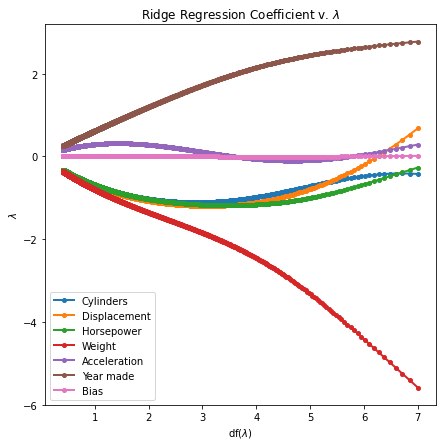

In [ ]:
# plot figure
import matplotlib.pyplot as plt

l = ['label {:d}'.format(i) for i in range(1,5)]

plt.figure(figsize=(7,7))

for i in w.columns[:-1]:
    plt.plot(list(w["lambdas"]),list(w[i]), label = i, marker = "o", markersize = 4,  linewidth=2)
    #plt.annotate(xy=w, xytext=(5,0), textcoords='offset points', text=l, va='center')
plt.legend()
plt.title('Ridge Regression Coefficient v. $\lambda$')
plt.ylabel('$\lambda$')
plt.xlabel("df($\lambda$)")
fig1 = plt.gcf()
plt.show()

# save figure
fig1.savefig('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1/7_curves.jpeg')

C. For $\lambda$ = 0, ..., 50, predict all 42 cases. Plot the root mean squared error (RMSE)$^3$ on the test set as a function of $\lambda$-- not as a function of df($\lambda$).

In [ ]:
y=[]
wrr=[]
rmse_list = []

# RMSE = sqrt(1/N(sum(yhat-y)^2)

for lambda_value in range(51):
    XTX = np.matmul(X_train.transpose(),X_train)
    lambdaI = lambda_value * np.identity(XTX.shape[0]) 
    XTy = np.matmul(X_train.transpose(),y_train)
    lambdaI_XTX_inv = np.linalg.inv(lambdaI + XTX)
    W = np.matmul(lambdaI_XTX_inv, XTy)
    wrr.append([i[0] for i in W.values.tolist()])
    y_predicted = np.matmul(X_test,W)
    y.append([i[0] for i in y_predicted.values.tolist()])
    rmse = np.sqrt(np.mean((y_predicted.values - y_test.values)**2))
    rmse_list.append(rmse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)')

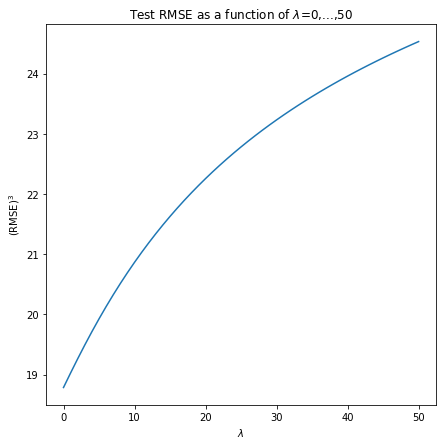

In [ ]:
# plot figure
lambda_values = np.arange(0,51,1)

plt.figure(figsize=(7,7))

plt.plot(lambda_values,np.array(rmse_list)**3)
plt.xlabel("$\lambda$")
plt.ylabel("(RMSE)$^3$")
plt.title("Test RMSE as a function of $\lambda$=0,...,50")
fig2 = plt.gcf()
plt.show()

# save figure
fig2.savefig('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1/rmse3_plot.jpeg')

Part 2

A. In one figure, plot the test RMSE as a funciton of $\lambda$ = 0, ..., 100 for p = 1,2,3 .

In [ ]:
p_value = np.arange(1,4,1)
rmse_2 = pd.DataFrame()

for p in p_value:
    rmse_list = []
    X_temp_train = X_train.values
    X_temp_test = X_test.values
    if(p!=1):
        for j in range(2,p+1):
            for k in range(6):
                mean = np.mean(np.array(X_temp_train[:,k])**j)
                std = np.sqrt(np.var(np.array(X_temp_train[:,k])**j))
                X_temp_train = np.append(X_temp_train, np.array(np.array(np.array(X_temp_train[:,k]**j) - mean)/std)
                                         .reshape(np.array((np.array(X_temp_train[:,k]**2) - mean)).shape[0], 1),1)
                X_temp_test = np.append(X_temp_test, np.array(np.array(np.array(X_temp_test[:,k]**j) - mean)/std)
                                        .reshape(np.array((np.array(X_temp_test[:,k]**2) - mean)).shape[0], 1),1)



    for lambda_value in range(101):
        XTX = np.matmul(X_temp_train.transpose(),X_temp_train)
        lambdaI = lambda_value * np.identity(XTX.shape[0]) 
        XTy = np.matmul(X_temp_train.transpose(),y_train)
        lambdaI_XTX_inv = np.linalg.inv(lambdaI + XTX)
        W = np.matmul(lambdaI_XTX_inv, XTy)
        
        y_predicted = np.matmul(X_temp_test,W)
        rmse = np.sqrt(np.mean((y_predicted.values - y_test.values)**2))
        rmse_list.append(rmse)
    rmse_2[p] = rmse_list


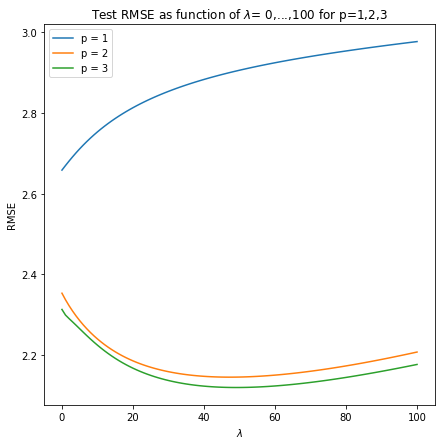

In [ ]:
# plot figure
lambda_values = np.arange(0,101,1)

plt.figure(figsize=(7,7))

for i in rmse_2.columns:
    plt.plot(lambda_values,rmse_2[i], label = ("p = " + str(i)))
plt.legend()
plt.xlabel("$\lambda$")
plt.ylabel("RMSE")
plt.title("Test RMSE as function of $\lambda$= 0,...,100 for p=1,2,3")
fig3 = plt.gcf()
plt.show()

# save figure
fig3.savefig('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework 1/rmse_plot_2.jpeg')